In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from alg_functions import *

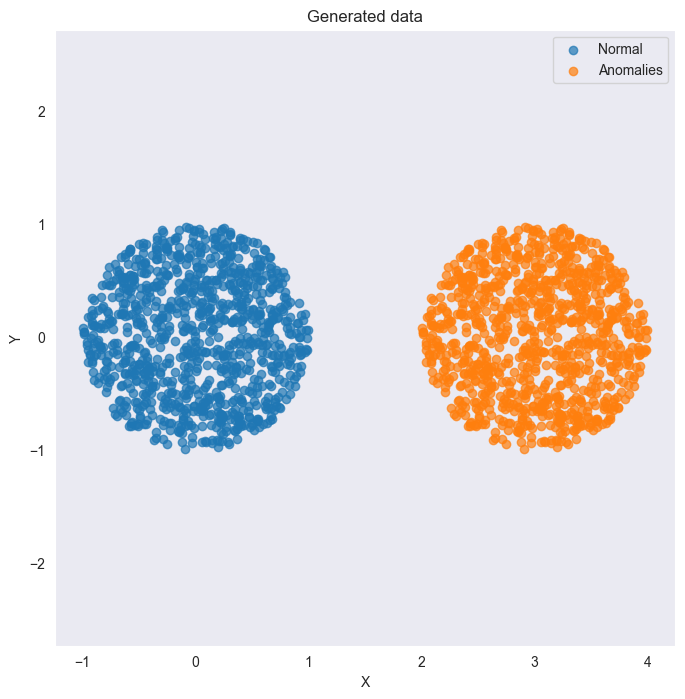

In [144]:
n_points = 1000
radius = 1
center1 = (0, 0)  # Center of the first circle
center2 = (3, 0)  # Center of the second circle 
normal, anomalies = generate_non_overlapping_circular_data(n_points, radius, center1, center2)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(normal[:, 0], normal[:, 1], alpha=0.7, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], alpha=0.7, label='Anomalies')
plt.title('Generated data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()

Awaystep generated data

In [145]:
epsilon = 0.001

center_AS_gd, radius_AS_gd, count_iterations_AS_gd, CPU_time_AS_gd, dual_val_list_AS_gd, dual_gap_list_AS_gd = frankWolfe_AwayStep(normal, epsilon, max_iterations=1000, step_size= "Exact")

Center: [0.00059049 0.00211228]
Radius: 0.9971897006777511
Iterations: 78
CPU time: 1.5872015953063965
Set Size: 4


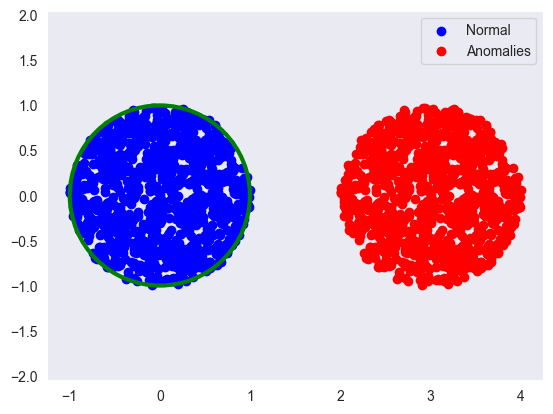

In [146]:
fig, ax = plt.subplots()

# Scatter plot for normal data points and anomalies
plt.scatter(normal[:, 0], normal[:, 1], color='blue', label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')

# Create and add the circle patch
circle = plt.Circle(tuple(center_AS_gd), radius_AS_gd, color='g', fill=False, linewidth=3)
ax.add_patch(circle)

# Set plot properties
plt.axis('equal')
plt.legend()

# Display the plot
plt.show()

Pairwise generated data

In [147]:
epsilon = 0.001

center_PWF_gd, radius_PWF_gd, count_iterations_PWF_gd, CPU_time_PWF_gd, dual_val_list_PWF_gd, dual_gap_list_PWF_gd = frankWolfe_Pairwise(normal, epsilon, max_iterations= 1000, step_size="Exact")

print("CENTER: ", center_PWF_gd)
print("RADIUS: ", radius_PWF_gd)
print("COUNT ITERATIONS: ", count_iterations_PWF_gd)
print("TOTAL TIME: ", CPU_time_PWF_gd)

Center: [0.00035998 0.00253497]
Radius: 0.9974197266514175
Iterations: 289
CPU time: 6.0939459800720215
Set Size: 3
CENTER:  [0.00035998 0.00253497]
RADIUS:  0.9974197266514175
COUNT ITERATIONS:  289
TOTAL TIME:  6.0939459800720215


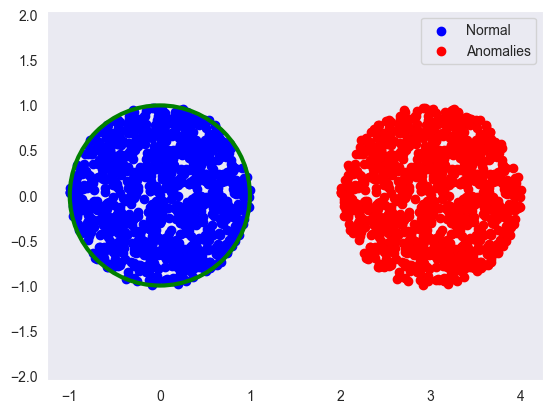

In [148]:
fig, ax = plt.subplots()

# Scatter plot for normal data points and anomalies
plt.scatter(normal[:, 0], normal[:, 1], color='blue', label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')

# Create and add the circle patch
circle = plt.Circle(tuple(center_PWF_gd), radius_PWF_gd, color='g', fill=False, linewidth=3)
ax.add_patch(circle)

# Set plot properties
plt.axis('equal')
plt.legend()

# Display the plot
plt.show()

AwayStep with 2 variables

In [149]:
from astroML.datasets import fetch_rrlyrae_combined

X, y = fetch_rrlyrae_combined()

X = X[-5000:]
y = y[-5000:]

stars = (y == 0)
rrlyrae = (y == 1)

# Create a DataFrame from the array X
df = pd.DataFrame(X[:,0:2], columns=['u-g', 'g-r'])

# Add the array y as a new column to the DataFrame
df['type'] = np.where(y==0, 'stars', 'RR-Lyrae')

pred_columns_lyrae = ['u-g', 'g-r']

display(df.head())

,u-g,g-r,type
0,1.028999,0.379000,stars
1,0.945000,0.305000,stars
2,1.118000,0.396000,stars
3,0.962000,0.375000,stars
4,1.052000,0.335001,stars


In [150]:
# we supply: A, epsilon, max_iterations=1000
A = df[df['type']=='RR-Lyrae'][['u-g', 'g-r']].values
epsilon = 0.001

center_AS, radius_AS, count_iterations_AS, CPU_time_AS, dual_val_list_AS, dual_gap_list_AS = frankWolfe_AwayStep(A, epsilon, max_iterations=1000, step_size  = "Exact")

print("CENTER: ", center_AS)
print("RADIUS: ", radius_AS)
print("COUNT ITERATIONS: ", count_iterations_AS)
print("TOTAL TIME: ", CPU_time_AS)

Center: [1.09449911 0.11800003]
Radius: 0.21787044263440536
Iterations: 8
CPU time: 0.07220101356506348
Set Size: 2
CENTER:  [1.09449911 0.11800003]
RADIUS:  0.21787044263440536
COUNT ITERATIONS:  8
TOTAL TIME:  0.07220101356506348


In [151]:
pred_columns = ['u-g', 'g-r']

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_AS, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS

positive_class = b'ab'
negative_class = b'c '
measure_accuracy(negative_class, positive_class, df)


,Metric,Count
0,True Positive (TP),0
1,False Negative (FN),0
2,True Negative (TN),0
3,False Positive (FP),0
4,Precision,0
5,Recall,0
6,F1 Score,0


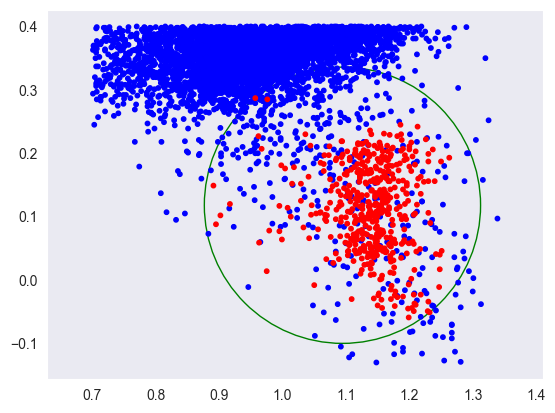

In [152]:
circle = plt.Circle(tuple(center_AS), radius_AS, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)
plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)

Pairwise with 2 variables

In [153]:
# we supply: A, epsilon, max_iterations=1000
epsilon = 0.001

center_PFW, radius_PFW, count_iterations_PFW, CPU_time_PFW, dual_val_list_PFW, dual_gap_list_PFW = frankWolfe_Pairwise(A, epsilon, max_iterations=1000, step_size="Exact")

print("CENTER: ", center_PFW)
print("RADIUS: ", radius_PFW)
print("COUNT ITERATIONS: ", count_iterations_PFW)
print("TOTAL TIME: ", CPU_time_PFW)


Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.047829627990722656
Set Size: 2
CENTER:  [1.09449911 0.11800003]
RADIUS:  0.21787044263440639
COUNT ITERATIONS:  4
TOTAL TIME:  0.047829627990722656


In [154]:
pred_columns = ['u-g', 'g-r']

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_PFW, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW

positive_class = b'ab'
negative_class = b'c '
measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),0
1,False Negative (FN),0
2,True Negative (TN),0
3,False Positive (FP),0
4,Precision,0
5,Recall,0
6,F1 Score,0


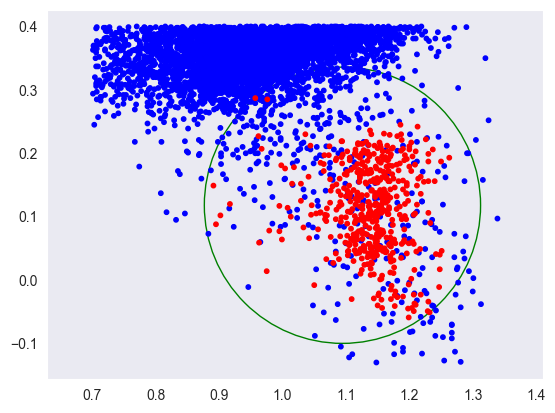

In [155]:
circle = plt.Circle(tuple(center_PFW), radius_PFW, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)

plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)

Data imbalance

In [156]:
print(sum((df["type"] == 'RR-Lyrae')) / df["type"].count())
print(sum((df["type"] == 'RR-Lyrae')))
print(sum((df["type"] == 'stars')))

0.0966
483
4517


Using the Full Dataset

In [157]:
Full_dataset = df[df['type'] == 'RR-Lyrae'].drop('type', axis=1).drop("InsideBall", axis = 1).values

Standardized Full Dataset

In [158]:
# Standardize the dataset
Full_dataset_mean = np.mean(Full_dataset, axis=0)
Full_dataset_std = np.std(Full_dataset, axis=0)

Standardized_full_dataset = (Full_dataset - Full_dataset_mean) / Full_dataset_std

Awaystep Full Dataset Harmonic

In [159]:
epsilon = 0.001

center_AS_fdh, radius_AS_fdh, count_iterations_AS_fdh, CPU_time_AS_fdh, dual_val_list_AS_fdh, dual_gap_list_AS_fdh = frankWolfe_AwayStep(Full_dataset, epsilon, max_iterations=1000, step_size  = "Harmonic")

Center: [1.09308158 0.11974231]
Radius: 0.21785884908914635
Iterations: 97
CPU time: 0.5812790393829346
Set Size: 2


In [160]:
pred_columns = ['u-g', 'g-r']

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_AS_fdh, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_fdh

positive_class = 'RR-Lyrae'
negative_class = 'stars'
measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),4040.000000
3,False Positive (FP),477.000000
4,Precision,0.502607
5,Recall,0.997930
6,F1 Score,0.668516


Text(0, 0.5, 'Function value')

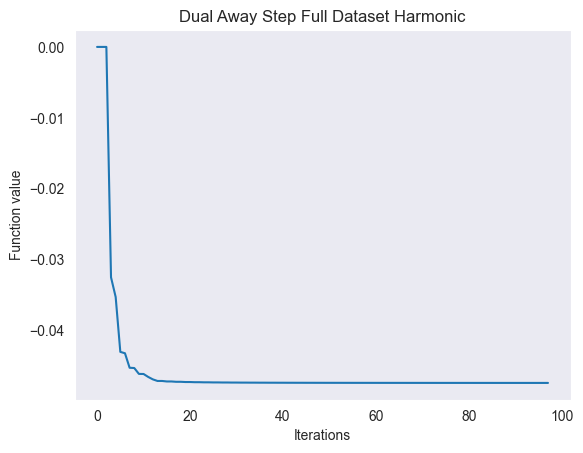

In [161]:
plt.plot(dual_val_list_AS_fdh)
plt.title('Dual Away Step Full Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

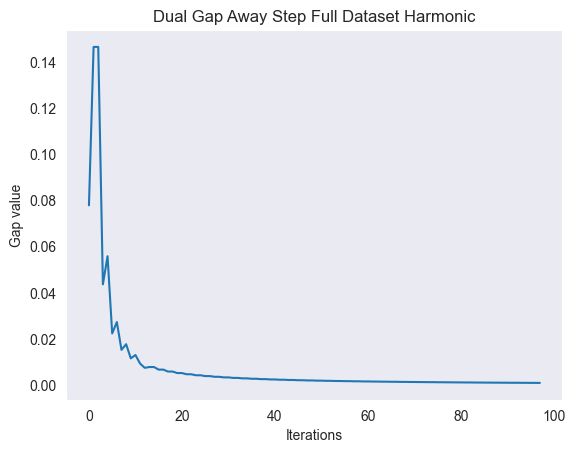

In [162]:
plt.plot(dual_gap_list_AS_fdh)
plt.title('Dual Gap Away Step Full Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Awaystep Standardized Full Dataset Harmonic

In [163]:
epsilon = 0.001

center_AS_sdh, radius_AS_sdh, count_iterations_AS_sdh, CPU_time_AS_sdh, dual_val_list_AS_sdh, dual_gap_list_AS_sdh = frankWolfe_AwayStep(Standardized_full_dataset, epsilon, max_iterations=1000, step_size="Harmonic")

Center: [-1.03477079 -0.13623195]
Radius: 3.5729827616191616
Iterations: 1000
CPU time: 6.129527568817139
Set Size: 3


In [164]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_AS_sdh, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_sdh

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),3970.000000
3,False Positive (FP),547.000000
4,Precision,0.467899
5,Recall,0.995859
6,F1 Score,0.636664


Text(0, 0.5, 'Function value')

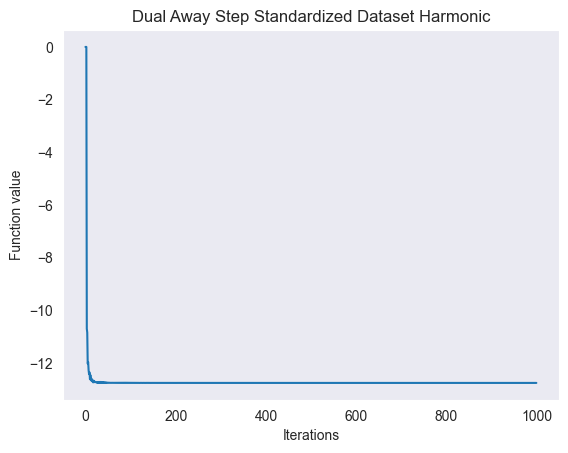

In [165]:
plt.plot(dual_val_list_AS_sdh)
plt.title('Dual Away Step Standardized Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

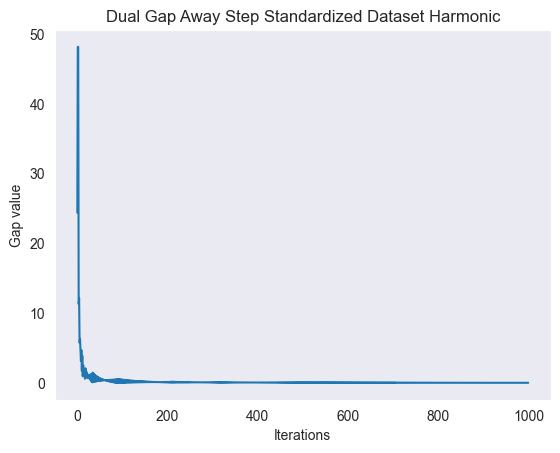

In [166]:
plt.plot(dual_gap_list_AS_sdh)
plt.title('Dual Gap Away Step Standardized Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Awaystep Full Dataset Armijo

In [167]:
epsilon = 0.001

center_AS_fda, radius_AS_fda, count_iterations_AS_fda, CPU_time_AS_fda, dual_val_list_AS_fda, dual_gap_list_AS_fda = frankWolfe_AwayStep(Full_dataset, epsilon, max_iterations=1000, step_size="Armijo")

Center: [1.0996599  0.11225328]
Radius: 0.17756083142297174
Iterations: 1000
CPU time: 56.43360638618469
Set Size: 5


In [168]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_AS_fda, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_fda

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),464.000000
1,False Negative (FN),19.000000
2,True Negative (TN),4293.000000
3,False Positive (FP),224.000000
4,Precision,0.674419
5,Recall,0.960663
6,F1 Score,0.792485


Text(0, 0.5, 'Function value')

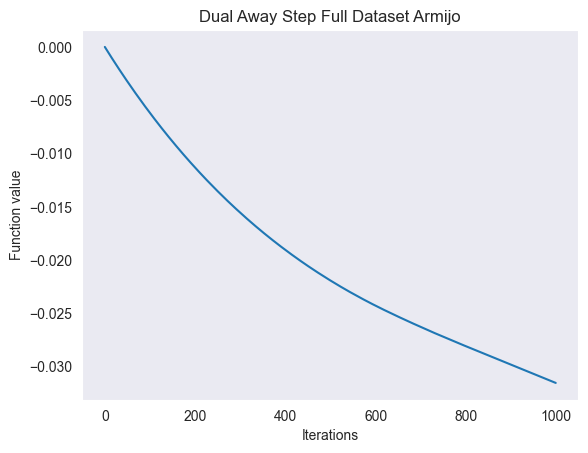

In [169]:
plt.plot(dual_val_list_AS_fda)
plt.title('Dual Away Step Full Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

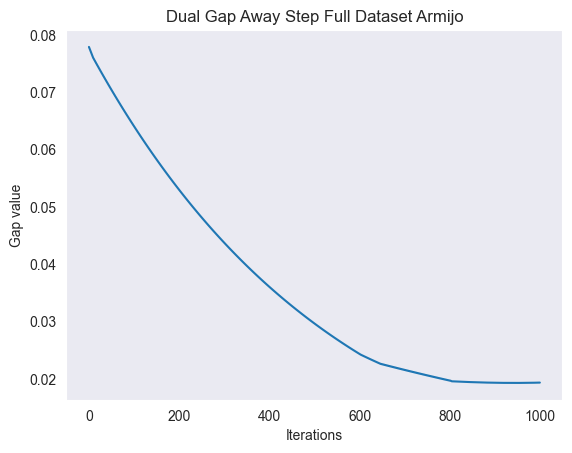

In [170]:
plt.plot(dual_gap_list_AS_fda)
plt.title('Dual Gap Away Step Full Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Awaystep Standardized Dataset Armijo

In [171]:
epsilon = 0.001

center_AS_sda, radius_AS_sda, count_iterations_AS_sda, CPU_time_AS_sda, dual_val_list_AS_sda, dual_gap_list_AS_sda = frankWolfe_AwayStep(Standardized_full_dataset, epsilon, max_iterations=1000, step_size="Armijo")


Center: [-1.01625654 -0.14927252]
Radius: 3.5728645097643663
Iterations: 1000
CPU time: 40.447614431381226
Set Size: 3


In [172]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_AS_sda, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_sda

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),3987.000000
3,False Positive (FP),530.000000
4,Precision,0.476285
5,Recall,0.997930
6,F1 Score,0.644816


Text(0, 0.5, 'Function value')

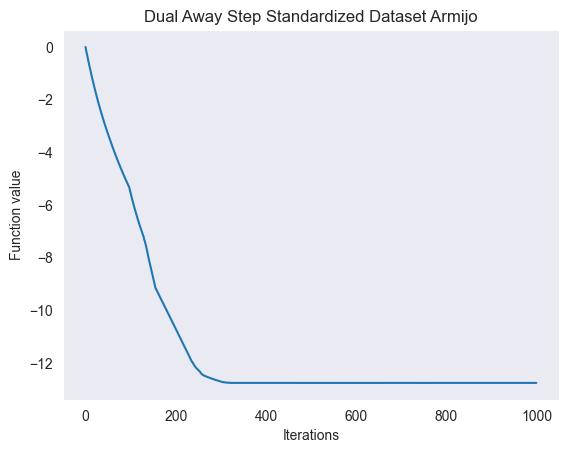

In [173]:
plt.plot(dual_val_list_AS_sda)
plt.title('Dual Away Step Standardized Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

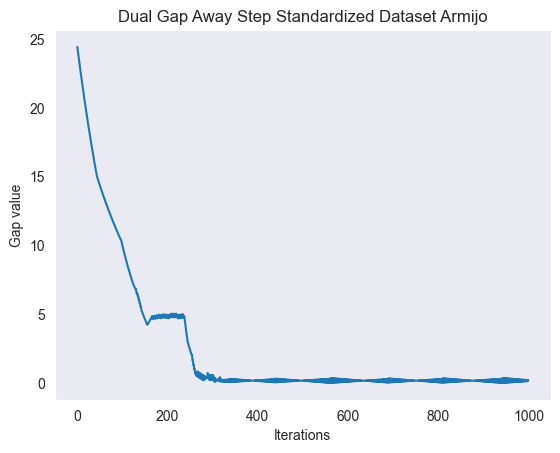

In [174]:
plt.plot(dual_gap_list_AS_sda)
plt.title('Dual Gap Away Step Standardized Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Pairwise Full Dataset Harmonic

In [175]:
epsilon = 0.001

center_PFW_fdh, radius_PFW_fdh, count_iterations_PFW_fdh, CPU_time_PFW_fdh, dual_val_list_PFW_fdh, dual_gap_list_PFW_fdh = frankWolfe_Pairwise(Full_dataset, epsilon, max_iterations=1000, step_size  = "Harmonic")

Center: [1.09493497 0.11746432]
Radius: 0.21786934514627482
Iterations: 41
CPU time: 0.21833395957946777
Set Size: 2


In [176]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_PFW_fdh, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW_fdh

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),4067.000000
3,False Positive (FP),450.000000
4,Precision,0.517167
5,Recall,0.997930
6,F1 Score,0.681272


Text(0, 0.5, 'Function value')

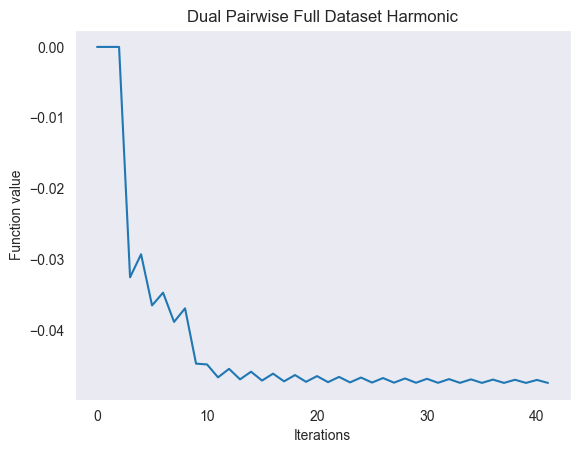

In [177]:
plt.plot(dual_val_list_PFW_fdh)
plt.title('Dual Pairwise Full Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

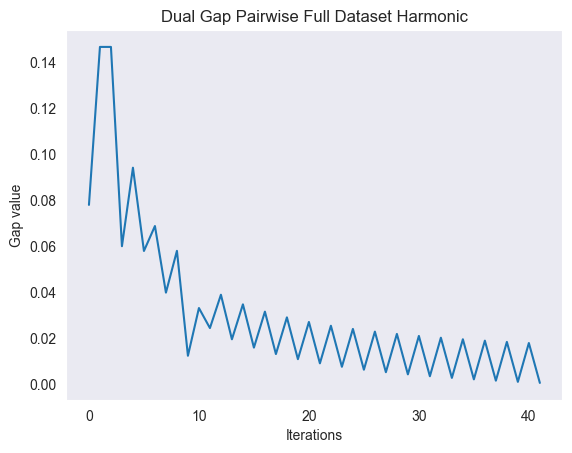

In [178]:
plt.plot(dual_gap_list_PFW_fdh)
plt.title('Dual Gap Pairwise Full Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Pairwise Standardized Dataset Harmonic

In [179]:
epsilon = 0.001

center_PFW_sdh, radius_PFW_sdh, count_iterations_PFW_sdh, CPU_time_PFW_sdh, dual_val_list_PFW_sdh, dual_gap_list_PFW_sdh = frankWolfe_Pairwise(Standardized_full_dataset, epsilon, max_iterations=1000, step_size  = "Harmonic")

Center: [-1.03241705 -0.13538554]
Radius: 3.572985838231801
Iterations: 110
CPU time: 0.5725865364074707
Set Size: 3


In [180]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_PFW_sdh, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW_sdh

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),3970.000000
3,False Positive (FP),547.000000
4,Precision,0.468416
5,Recall,0.997930
6,F1 Score,0.637566


Text(0, 0.5, 'Function value')

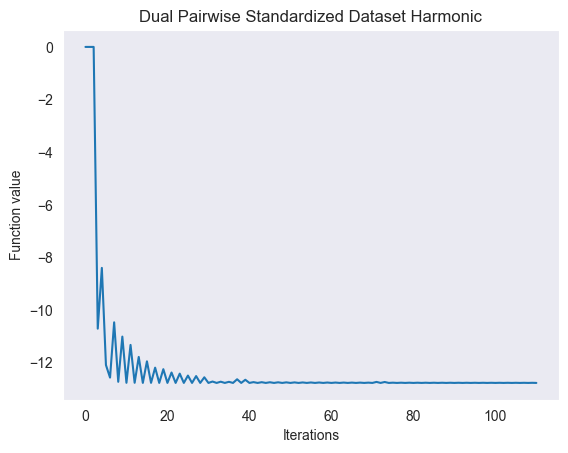

In [181]:
plt.plot(dual_val_list_PFW_sdh)
plt.title('Dual Pairwise Standardized Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

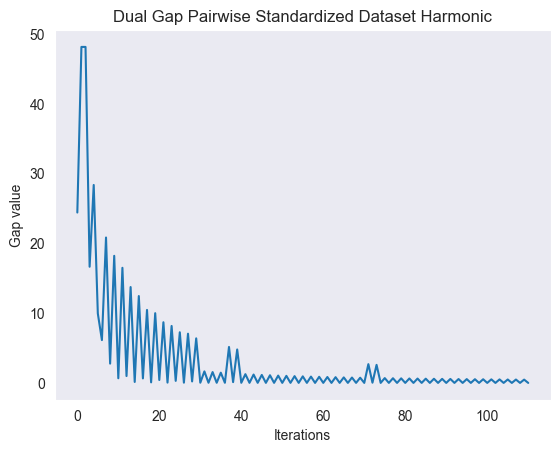

In [182]:
plt.plot(dual_gap_list_PFW_sdh)
plt.title('Dual Gap Pairwise Standardized Dataset Harmonic')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Pairwise Full Dataset Armijo

In [183]:
epsilon = 0.001

center_PFW_fda, radius_PFW_fda, count_iterations_PFW_fda, CPU_time_PFW_fda, dual_val_list_PFW_fda, dual_gap_list_PFW_fda = frankWolfe_Pairwise(Full_dataset, epsilon, max_iterations=1000, step_size  = "Armijo")

Center: [1.07467744 0.10162585]
Radius: 0.20235280556677304
Iterations: 1000
CPU time: 55.33767867088318
Set Size: 5


In [184]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_PFW_fda, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW_fda

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),475.000000
1,False Negative (FN),8.000000
2,True Negative (TN),4213.000000
3,False Positive (FP),304.000000
4,Precision,0.609756
5,Recall,0.983437
6,F1 Score,0.752773


Text(0, 0.5, 'Function value')

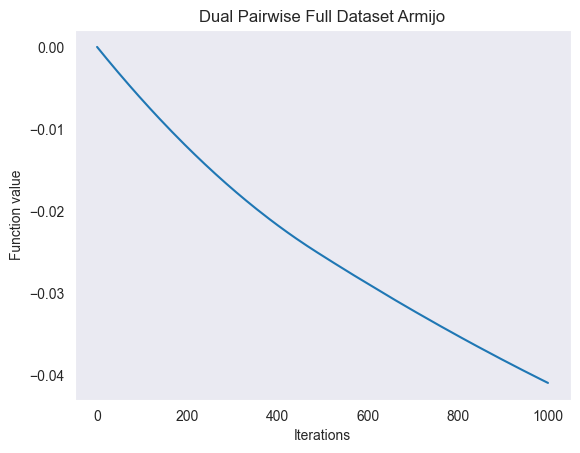

In [185]:
plt.plot(dual_val_list_PFW_fda)
plt.title('Dual Pairwise Full Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

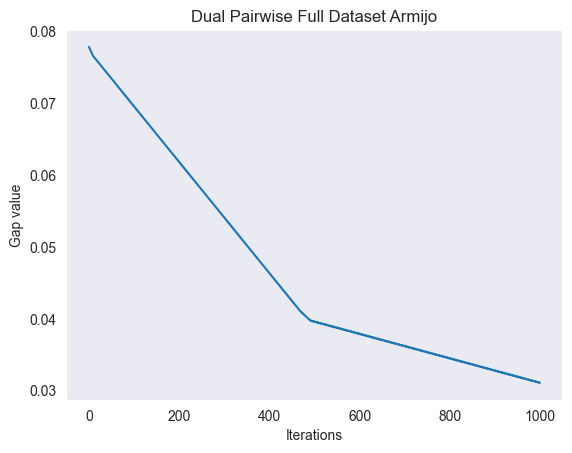

In [186]:
plt.plot(dual_gap_list_PFW_fda)
plt.title('Dual Pairwise Full Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Pairwise Standardized Dataset Armijo

In [187]:
epsilon = 0.001

center_PFW_sda, radius_PFW_sda, count_iterations_PFW_sda, CPU_time_PFW_sda, dual_val_list_PFW_sda, dual_gap_list_PFW_sda = frankWolfe_Pairwise(Standardized_full_dataset, epsilon, max_iterations=1000, step_size  = "Armijo")

Center: [-1.03250331 -0.10299536]
Radius: 3.572933190959087
Iterations: 1000
CPU time: 40.385671615600586
Set Size: 3


In [188]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_PFW_sda, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PFW_sda

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),3938.000000
3,False Positive (FP),579.000000
4,Precision,0.454288
5,Recall,0.997930
6,F1 Score,0.624352


Text(0, 0.5, 'Function value')

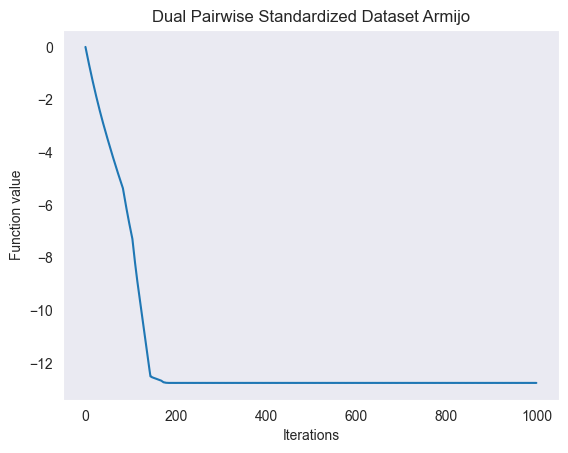

In [189]:
plt.plot(dual_val_list_PFW_sda)
plt.title('Dual Pairwise Standardized Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Gap value')

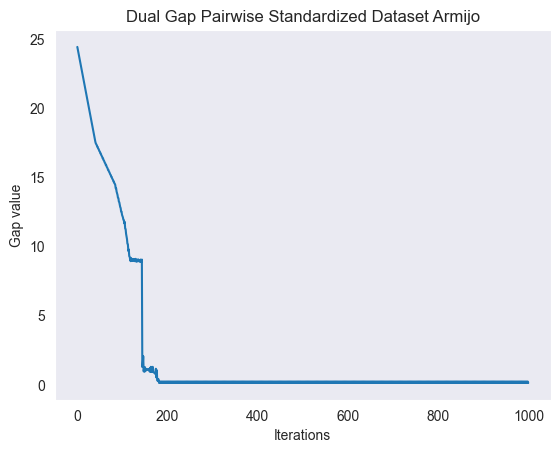

In [190]:
plt.plot(dual_gap_list_PFW_sda)
plt.title('Dual Gap Pairwise Standardized Dataset Armijo')
plt.xlabel('Iterations')
plt.ylabel('Gap value')

Awaystep Full Dataset Exact Line Search

In [191]:
epsilon = 0.001

center_AS_fde, radius_AS_fde, count_iterations_AS_fde, CPU_time_AS_fde, dual_val_list_AS_fde, dual_gap_list_AS_fde = frankWolfe_AwayStep(Full_dataset, epsilon, max_iterations=1000, step_size = "Exact")

Center: [1.09449911 0.11800003]
Radius: 0.21787044263440536
Iterations: 8
CPU time: 0.06656098365783691
Set Size: 2


In [192]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_AS_fde, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_fde

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),4059.000000
3,False Positive (FP),458.000000
4,Precision,0.512247
5,Recall,0.995859
6,F1 Score,0.676512


Text(0, 0.5, 'Function value')

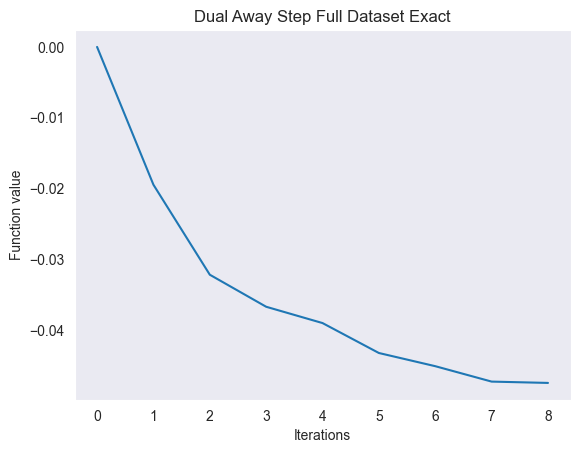

In [193]:
plt.plot(dual_val_list_AS_fde)
plt.title('Dual Away Step Full Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Function value')

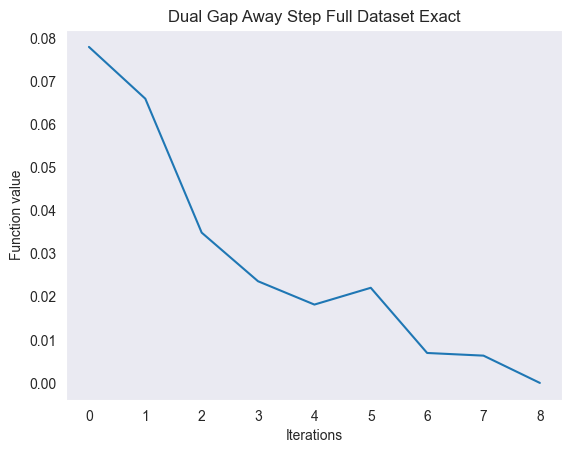

In [194]:
plt.plot(dual_gap_list_AS_fde)
plt.title('Dual Gap Away Step Full Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Pairwise Full Dataset Exact Line Search

In [195]:
epsilon = 0.001

center_PWF_fde, radius_PWF_fde, count_iterations_PWF_fde, CPU_time_PWF_fde, dual_val_list_PWF_fde, dual_gap_list_PWF_fde = frankWolfe_Pairwise(Full_dataset, epsilon, max_iterations=1000, step_size = "Exact")


Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.04824328422546387
Set Size: 2


In [196]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns] - center_PWF_fde, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_PWF_fde

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),4059.000000
3,False Positive (FP),458.000000
4,Precision,0.512247
5,Recall,0.995859
6,F1 Score,0.676512


In [ ]:
plt.plot(dual_val_list_PWF_fde)
plt.title('Dual Pairwise Full Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

In [ ]:
plt.plot(dual_gap_list_PWF_fde)
plt.title('Dual Gap Pairwise Full Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Awaystep Standardized Dataset Exact Line Search

In [197]:
epsilon = 0.001

center_AS_sde, radius_AS_sde, count_iterations_AS_sde, CPU_time_AS_sde, dual_val_list_AS_sde, dual_gap_list_AS_sde = frankWolfe_AwayStep(Standardized_full_dataset, epsilon, max_iterations=1000, step_size = "Exact")

Center: [-1.03238717 -0.13560492]
Radius: 3.5729858102349907
Iterations: 81
CPU time: 0.6083235740661621
Set Size: 3


In [198]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_AS_sde, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_sde

measure_accuracy(negative_class, positive_class, df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),3970.000000
3,False Positive (FP),547.000000
4,Precision,0.467899
5,Recall,0.995859
6,F1 Score,0.636664


Text(0, 0.5, 'Function value')

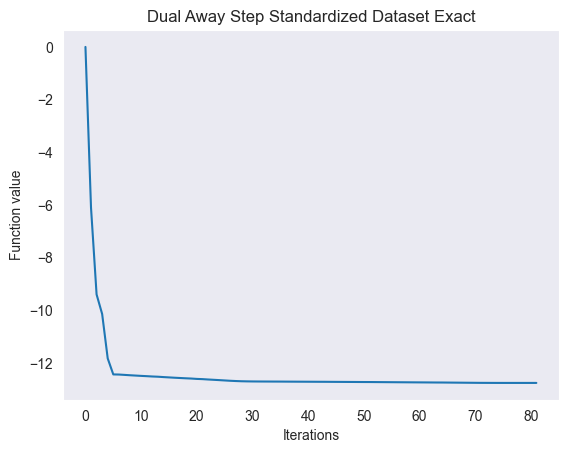

In [199]:
plt.plot(dual_val_list_AS_sde)
plt.title('Dual Away Step Standardized Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Function value')

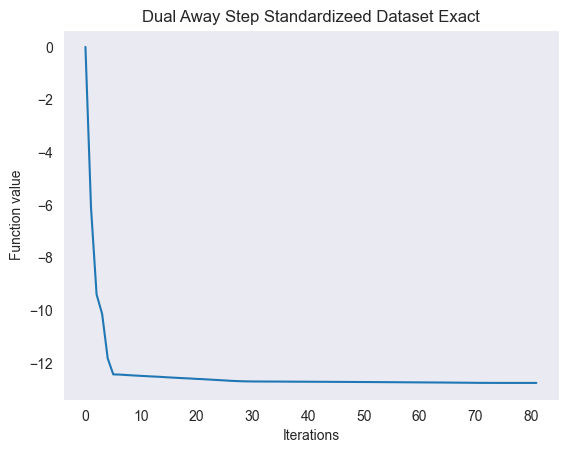

In [200]:
plt.plot(dual_val_list_AS_sde)
plt.title('Dual Gap Away Step Standardizeed Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Pairwise Standardized Dataset Exact Line Search

In [209]:
epsilon = 0.001

center_PWF_sde, radius_PWF_sde, count_iterations_PWF_sde, CPU_time_PWF_sde, dual_val_list_PWF_sde, dual_gap_list_PWF_sde = frankWolfe_Pairwise(Standardized_full_dataset, epsilon, max_iterations=1000, step_size = "Exact")

Center: [-1.03241202 -0.13549929]
Radius: 3.57298586275933
Iterations: 43
CPU time: 0.3019685745239258
Set Size: 3


In [ ]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm((df[pred_columns] - np.mean(Full_dataset, axis=0)) / np.std(Full_dataset, axis=0) - center_PWF_sde, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_AS_sde

measure_accuracy(negative_class, positive_class, df)

Text(0, 0.5, 'Function value')

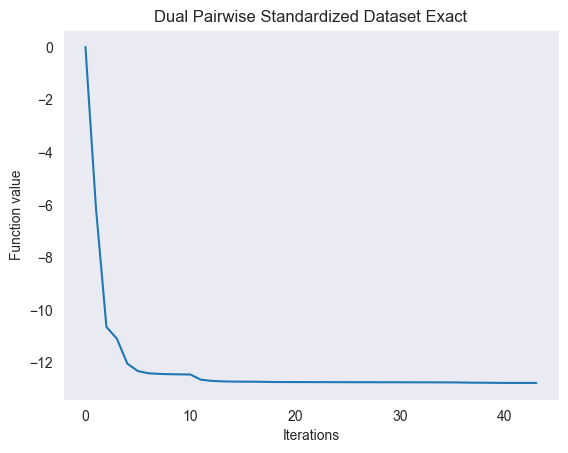

In [215]:
plt.plot(dual_val_list_PWF_sde)
plt.title('Dual Pairwise Standardized Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')

Text(0, 0.5, 'Function value')

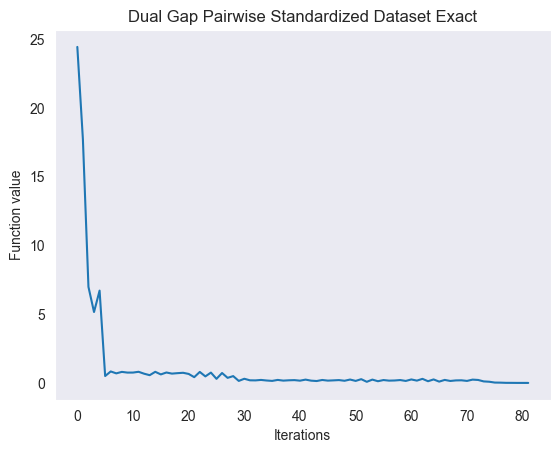

In [214]:
plt.plot(dual_gap_list_AS_sde)
plt.title('Dual Gap Pairwise Standardized Dataset Exact')
plt.xlabel('Iterations')
plt.ylabel('Function value')